In [1]:
# import the liblaries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Some Numerical Information about the Data

In [89]:
# look at dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [90]:
# look at unique values of columns
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Data Cleaning

In [3]:
# drop unnecessary columns 
df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1, inplace=True)

## Data Visualation

In [4]:
# Define list of Continuous columns Names
continuous = ['CreditScore', 'Balance', 'EstimatedSalary']

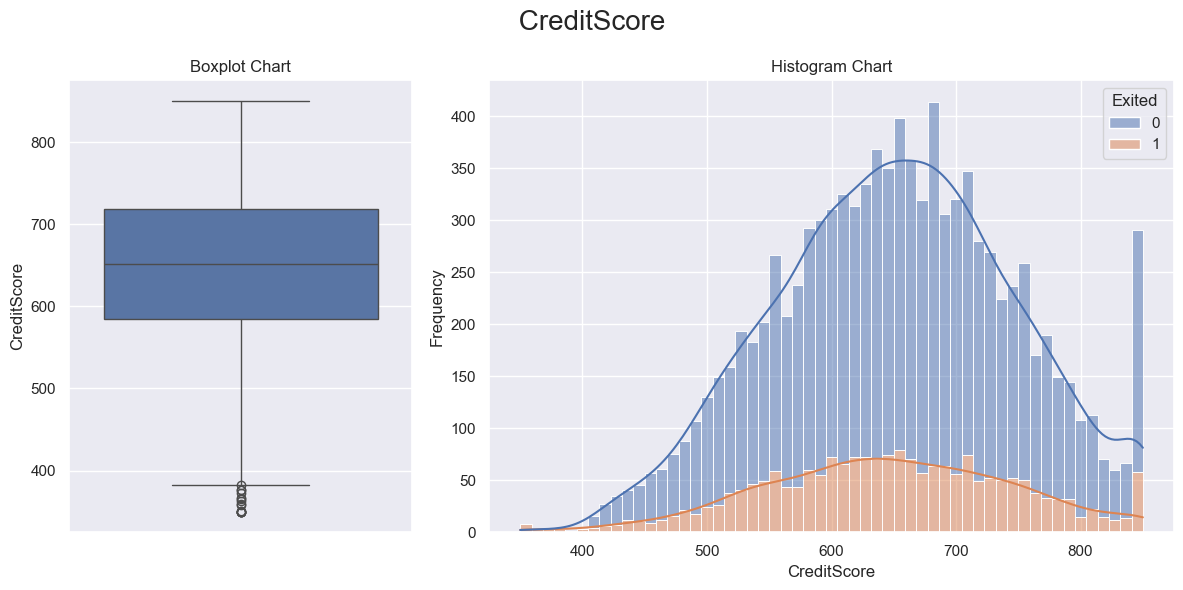

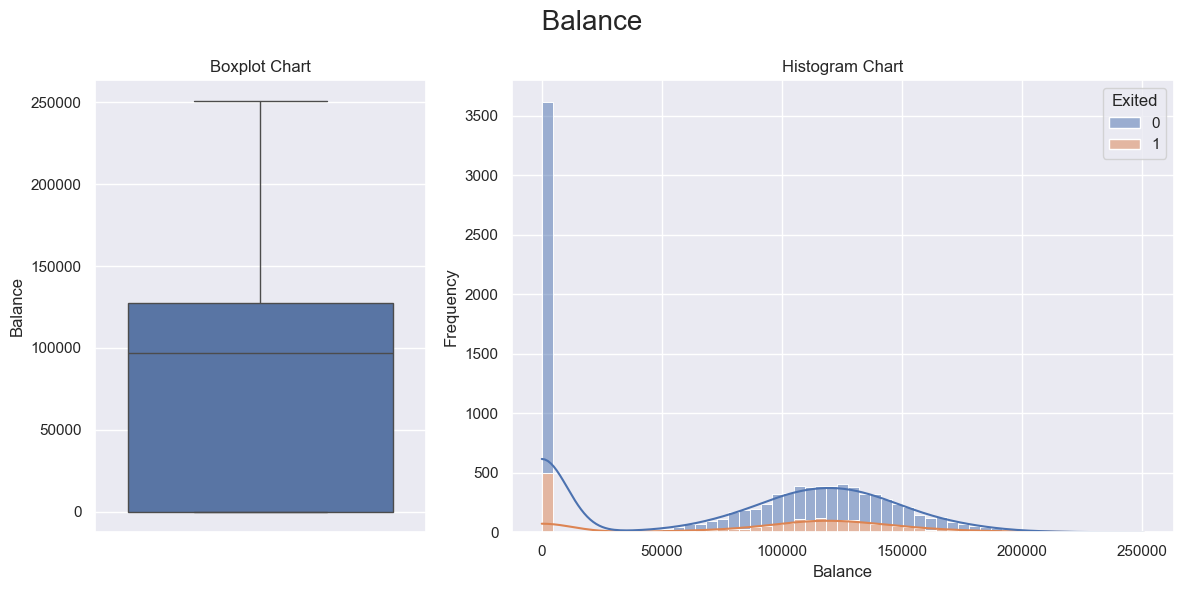

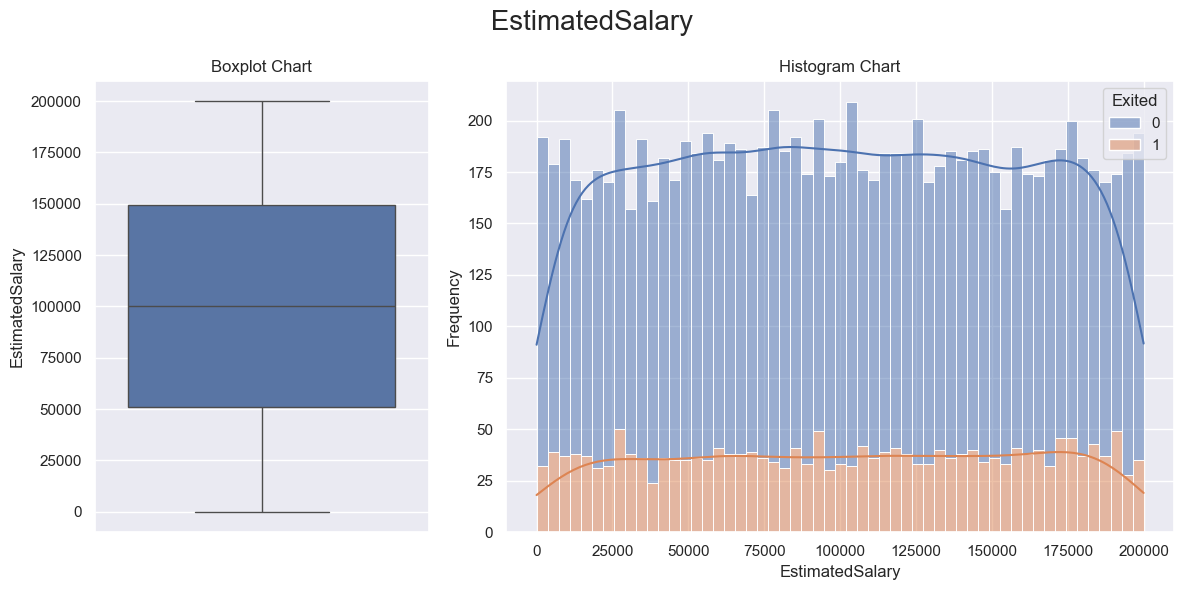

In [5]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Exited')    

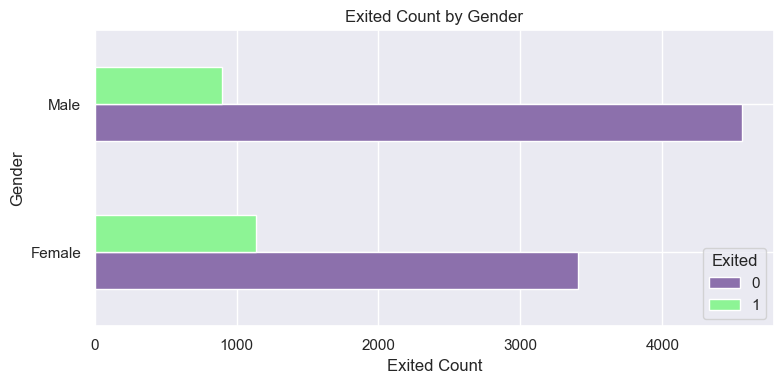

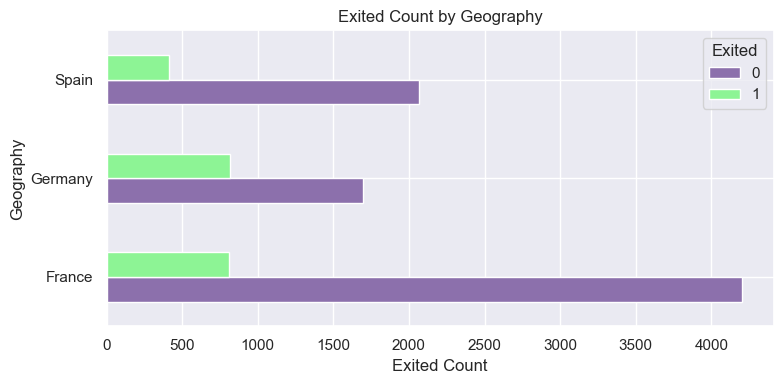

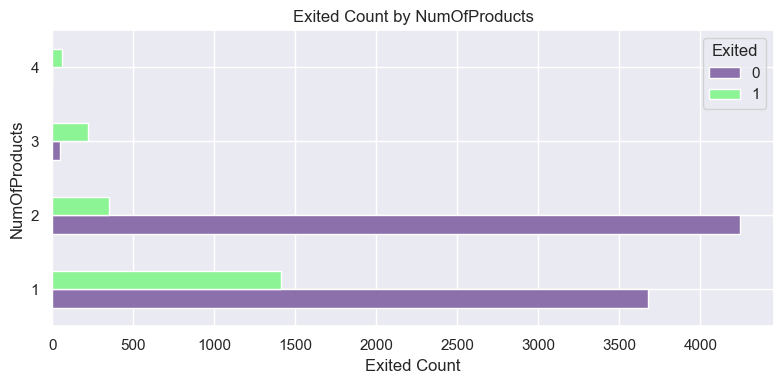

In [6]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#8c70ac', '#8df495'], figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Gender', 'Exited', df)
bar_plot('Geography', 'Exited', df)
bar_plot('NumOfProducts', 'Exited', df)

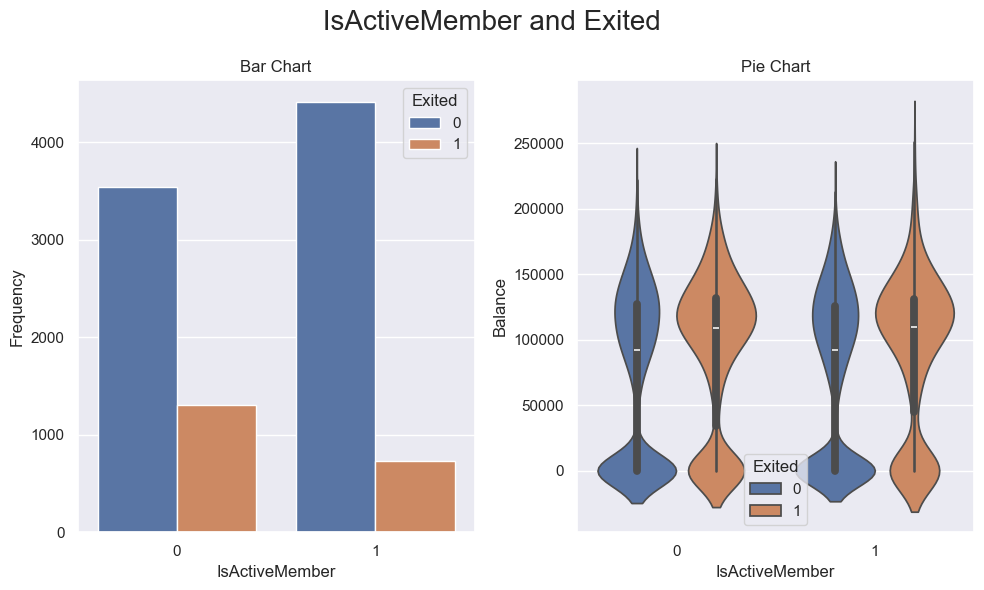

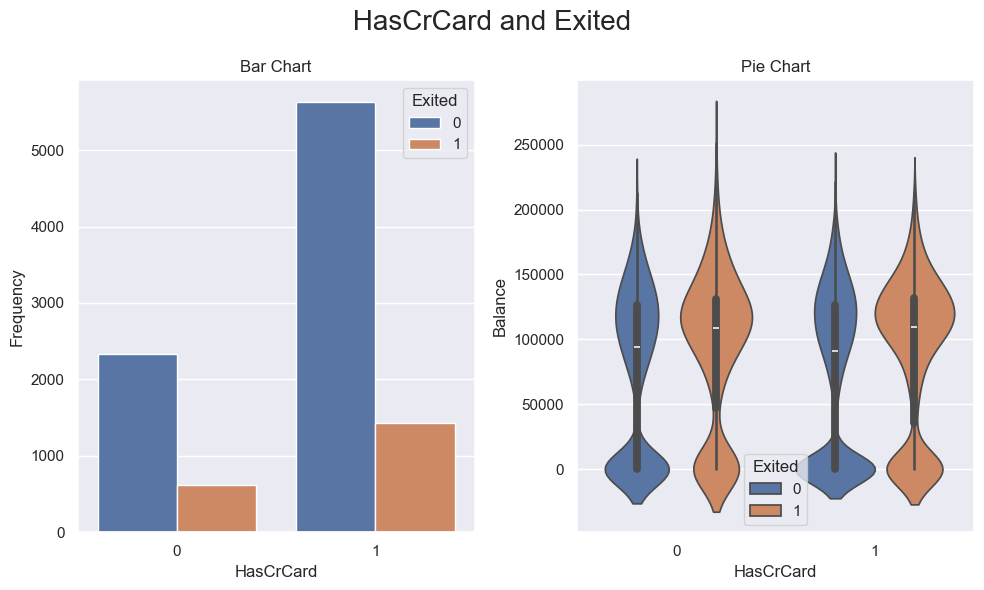

In [7]:
# distribution of categorical features

def plot_categorical(data, x, y, hue):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {x} and {hue} ', fontsize=20) 
    
    sns.countplot(x=x, hue=hue, data=data, ax=ax[0])
    ax[0].set_title('Bar Chart')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(x)
    
    sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_xlabel(x)
    ax[1].set_ylabel(y)
    ax[1].legend(loc='lower center', title=hue)
    
    plt.tight_layout()
    plt.show()

plot_categorical(x='IsActiveMember', y='Balance', hue='Exited', data=df)
plot_categorical(x='HasCrCard', y='Balance', hue='Exited', data=df)

## Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['CreditScore', 'Balance', 'EstimatedSalary']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected column
df['Gender'] = le.fit_transform(df['Gender'])

# Apply Get Dummies to the selected column
df = pd.get_dummies(df, columns=['Geography'])

## Training and Evaluating Different Models

In [11]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Exited'], axis=1)
y = df['Exited']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [13]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.8718571428571429
Test accuracy: Gradient Boosting 0.872

Training accuracy: K-Nearest Neighbors 0.8608571428571429
Test accuracy: K-Nearest Neighbors 0.822

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.8716666666666667

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.806

Training accuracy: XGB Classifier 0.9585714285714285
Test accuracy: XGB Classifier 0.866



In [78]:
#Craete a Object of Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train and Evaluate the Model
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

accuracy = accuracy_score(y_test, gb_pred)
print(f'R-squared (Gradien Boosting Classifier): {round(accuracy, 3)}')

R-squared (Gradien Boosting Classifier): 0.872


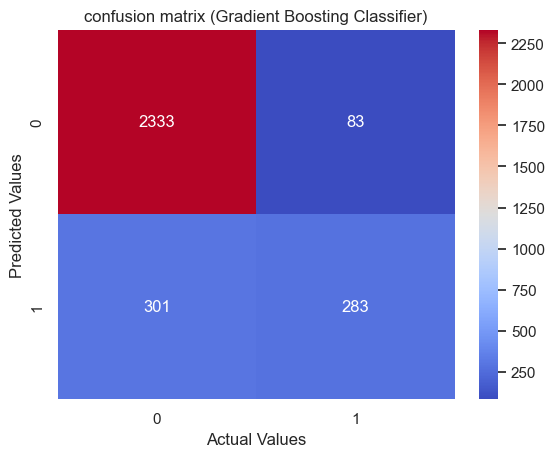

In [81]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,gb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [82]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.48      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



### As we can see in the above cell , precision of our model in the '1' values of taget is too weak , so we gonna use of imblearn library for balancing values of target 

In [14]:
# redefine x and y
x = df.drop(['Exited'], axis=1)
y = df['Exited']  # Target Variable

In [15]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Apply ADASYN to the x and y 
x_resampled, y_resampled = adasyn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [16]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.8474343310934637
Test accuracy: Gradient Boosting 0.8448381185094685

Training accuracy: K-Nearest Neighbors 0.9002748930971289
Test accuracy: K-Nearest Neighbors 0.856139279169212

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.8924862553451436

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.8246792913866829

Training accuracy: XGB Classifier 0.9474648747709224
Test accuracy: XGB Classifier 0.8628588882101405



In [19]:
#Craete a Object of Random Forest Classifier
rf = RandomForestClassifier()

# Train and Evaluate the Model
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f'R-squared (Random Forest Classifier): {round(accuracy, 3)}')

R-squared (Random Forest Classifier): 0.892


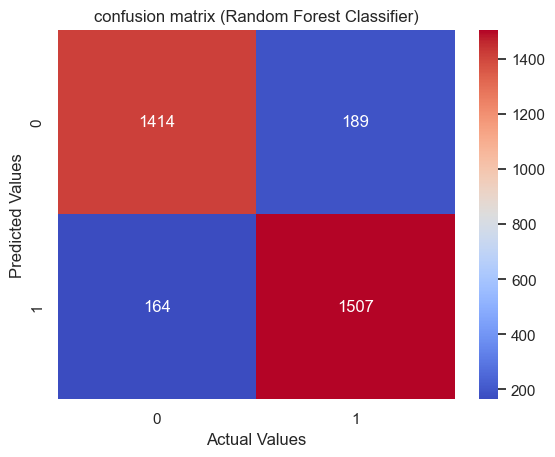

In [20]:
# Visualize confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Random Forest Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [21]:
# Visualize Classification report for Random Forest Classifier
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1603
           1       0.89      0.90      0.90      1671

    accuracy                           0.89      3274
   macro avg       0.89      0.89      0.89      3274
weighted avg       0.89      0.89      0.89      3274



By employing the ADASYN method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting fraudulent warranty claims.

These findings demonstrate that utilizing class balancing techniques like ADASYN can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ ADASYN and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com